In [291]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [292]:
citydf = pd.read_csv("city_data.csv")
ridedf = pd.read_csv("ride_data.csv")


In [293]:
groupcity = ridedf.groupby(['city'])
groupcity.count().head(10)

,date,fare,ride_id
city,,,
Alvarezhaven,31,31,31
Alyssaberg,26,26,26
Anitamouth,9,9,9
Antoniomouth,22,22,22
Aprilchester,19,19,19
Arnoldview,31,31,31
Campbellport,15,15,15
Carrollbury,10,10,10
Carrollfort,29,29,29


In [294]:
avgfare = groupcity["fare"].mean()
avgfare.head()

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64

In [295]:
datasum = {"Average Fare":avgfare, "Rides Per City": cityrides}
datasum = pd.DataFrame(datasum)

In [296]:
datasum.head(5)

,Average Fare,Rides Per City
city,,
Alvarezhaven,23.928710,31
Alyssaberg,20.609615,26
Anitamouth,37.315556,9
Antoniomouth,23.625000,22
Aprilchester,21.981579,19


In [297]:
citydf = citydf.dropna(how='any')

In [298]:
datasum = datasum.dropna(how='any')

In [299]:
citydf.head()

,city,driver_count,type
0,Alvarezhaven,21,Urban
1,Alyssaberg,67,Urban
2,Anitamouth,16,Suburban
3,Antoniomouth,21,Urban
4,Aprilchester,49,Urban


In [300]:
citydf = citydf.set_index(['city'])

In [301]:
citydf.head()

,driver_count,type
city,,
Alvarezhaven,21,Urban
Alyssaberg,67,Urban
Anitamouth,16,Suburban
Antoniomouth,21,Urban
Aprilchester,49,Urban


In [302]:
finaldf = pd.concat([citydf, datasum], axis=1)

In [303]:
finaldf.head()

,driver_count,type,Average Fare,Rides Per City
city,,,,
Alvarezhaven,21,Urban,23.928710,31
Alyssaberg,67,Urban,20.609615,26
Anitamouth,16,Suburban,37.315556,9
Antoniomouth,21,Urban,23.625000,22
Aprilchester,49,Urban,21.981579,19


In [304]:
urban = finaldf.loc[finaldf["type"] == "Urban"]
suburban = finaldf.loc[finaldf["type"] == "Suburban"]
rural = finaldf.loc[finaldf["type"] == "Rural"]

In [305]:
ax = urban.plot.scatter(x='Rides Per City', y='Average Fare',
                        color='DarkBlue', label='Urban');
suburban.plot.scatter(x='Rides Per City', y='Average Fare',
                        color='Green', label='Suburban');
rural.plot.scatter(x='Rides Per City', y='Average Fare',
                        color='Red', label='Rural', ax=ax)


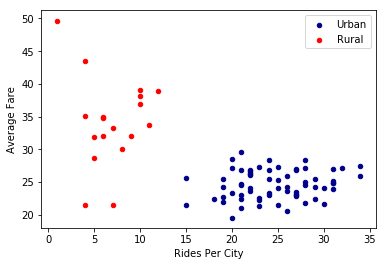

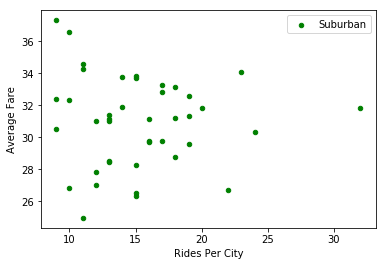

In [306]:
plt.show()

In [307]:
finaldf.head()

,driver_count,type,Average Fare,Rides Per City
city,,,,
Alvarezhaven,21,Urban,23.928710,31
Alyssaberg,67,Urban,20.609615,26
Anitamouth,16,Suburban,37.315556,9
Antoniomouth,21,Urban,23.625000,22
Aprilchester,49,Urban,21.981579,19


In [308]:
type_group = finaldf.groupby('type')

In [309]:
count_group = type_group['Average Fare'].sum()

In [310]:
count_group.head()

type
Rural        615.728572
Suburban    1268.627391
Urban       1623.863390
Name: Average Fare, dtype: float64

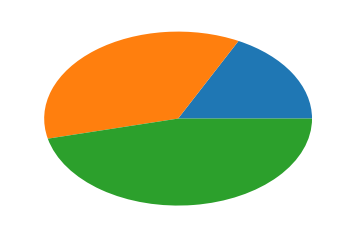

In [321]:
plt.pie(count_group)
plt.show()

In [323]:
count_riders = type_group['Rides Per City'].sum()
count_riders.head()

type
Rural        125
Suburban     625
Urban       1625
Name: Rides Per City, dtype: int64

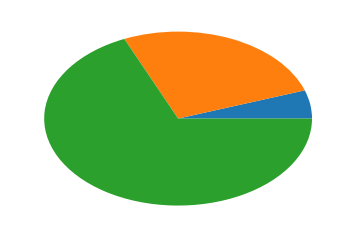

In [324]:
plt.pie(count_riders)
plt.show()

In [325]:
count_drivers = type_group['driver_count'].sum()
count_drivers.head()

type
Rural        104
Suburban     638
Urban       2607
Name: driver_count, dtype: int64

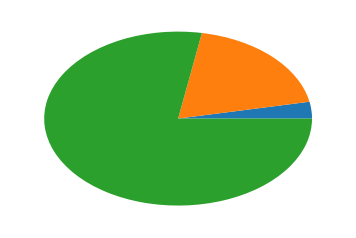

In [326]:
plt.pie(count_drivers)
plt.show()

In [ ]:
#Suburban and rural rides are the most expensive
#Urban cities have the most rides
#Urban cities have the most drivers